## Task: Diagnosing breast cancer

We have found patient data for breast cancer on the internet. Can we train a model that can make the diagnosis?
 
=> Source of the data: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

The goal is to predict the type of tumor (column: `diagnosis`). With a well-performing model, we could potentially save some surgeries or at least alleviate many concerns.

- **M:** Malignant, malignant tumor
- **B:** Benign, benign cancer

**Task:**
 - Train a model.
 - You cannot directly predict the `diagnosis` column. First, it needs to be converted into a column with 0 and 1 values.
 - Evaluate various classification models... which one works the best?
 - Note that you may need to scale the data for some models.
 - Make sure to set aside test data - only use it at the very end to determine accuracy on never-before-seen data.
   - **Important:** To make this meaningful, we can only assess accuracy on the test data *after* selecting the model (and tuning the parameters)!
 - The `id` column is likely not informative for our model. You should consider removing this column from the data.

**Bonus questions:**
 - For some models, PCA (Principal Component Analysis) might be worthwhile.
 - How many columns does the model actually need? Can it work with fewer columns? This would mean our doctor would need to measure and enter fewer values into the computer, saving valuable time!

In [1]:
# Matplotlib config

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%config InlineBackend.rc = {'figure.figsize': (5.0, 4.0)}

import pandas as pd
import numpy as np

df = pd.read_csv("cancer.csv")
df.drop("id", axis = 1, inplace = True)
df["diagnosis"] = df["diagnosis"] == "M"

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,True,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,True,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,True,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,True,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.tree import DecisionTreeClassifier

X = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

model = GridSearchCV(DecisionTreeClassifier(), param_grid = {
    'max_depth': list(range(1, 20)),
    "min_samples_split": [1, 5, 10, 15, 25, 50, 75, 125]
}, cv = RepeatedKFold(), n_jobs = 15)

model.fit(X_train, y_train)

print(model.best_score_)
print(model.score(X_test, y_test))

0.9268131868131867
0.9298245614035088


In [4]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

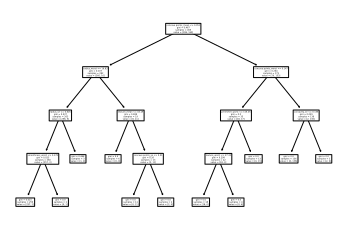

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(model.best_estimator_, feature_names = X.columns)
plt.show();

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

X = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

model = GridSearchCV(RandomForestClassifier(), param_grid = {
    'max_depth': list(range(1, 21, 5)),
    "min_samples_split": [1, 5, 10],
    'n_estimators': [1, 10, 100]
}, cv = RepeatedKFold(), n_jobs = 15)

model.fit(X_train, y_train)

print(model.best_score_)
print(model.best_params_)

0.9564835164835164
{'max_depth': 16, 'min_samples_split': 5, 'n_estimators': 100}
